<a href="https://colab.research.google.com/github/wookie0127/udacity-write-blog/blob/main/CIRSP_DM_about_Boston_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

 - Abstract: accomodation sharing platform
 - Business Model: fee from both hosts and guests
   - about 3% from hosts
   - 6~12% from guests
 - Objectives: increasing transactions between hosts and guests
 - Reference: https://bmtoolbox.net/stories/airbnb/

## How to make objectives possible??

 - ### Hypothesis: guests may make a reservation for some reasons below
   - busy season
     - people may make a reservation in a specific duration like summer vacation
   - popular location
     - accomodations in specific locations are popular to stay
   - room type
     - people like specific room type
   - prefered travel weekday
     - people usually make a reservation on specific day in a week and specific duration
   - prefer price range
     - may make many reservation if a price in  a specific range

# 2. Data Understanding
 - listings: full descriptions and average review score
 - calendar: listing_id and price, availability for that day
 - reviews: unique reviewer id and comments

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
# libarary
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from collections import defaultdict


In [3]:
import matplotlib
print(matplotlib.__version__)
print(pd.__version__)
print(sns.__version__)

3.2.2
1.1.5
0.11.2


In [4]:
# setting data directory
curdir = '/content/gdrive/MyDrive/Udacity/Nanodegree/DataScientist/Write_A_Data_Science_Blog_Post'

## Collect all data

In [5]:
files = defaultdict(list)
dirs = [f'{curdir}/{path}' for path in os.listdir(curdir)]
for item in dirs:
  if os.path.isfile(item):
    # item is a file
    continue
  fs = os.listdir(item)
  item_name = item.split('/')[-1]
  files[item_name].extend(
      [f"{item}/{fpath}" for fpath in fs if fpath.endswith('csv')]
  )

In [6]:
bt_rev_df = pd.read_csv(files['Boston_AirBnb'][0])
bt_cal_df = pd.read_csv(files['Boston_AirBnb'][1])
bt_list_df = pd.read_csv(files['Boston_AirBnb'][2])

## Explore Data

### Review

In [10]:
# review
print(bt_rev_df.shape)
print(bt_rev_df.columns)

(68275, 6)
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


In [11]:
bt_rev_df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

In [12]:
bt_rev_df.iloc[0]

listing_id                                                 1178162
id                                                         4724140
date                                                    2013-05-21
reviewer_id                                                4298113
reviewer_name                                              Olivier
comments         My stay at islam's place was really cool! Good...
Name: 0, dtype: object

In [14]:
print(bt_rev_df.reviewer_id.nunique())
print(bt_rev_df.reviewer_name.nunique())

63789
14775


  - comments field has 53 empty rows
  - number of reviewer_id is not equal to number of reviewer name
    - reviewer can make several id
    - users may have saveral reviewer ids

### Calendar

In [15]:
 # calendar
print(bt_cal_df.shape)
print(bt_cal_df.columns)

(1308890, 4)
Index(['listing_id', 'date', 'available', 'price'], dtype='object')


In [16]:
bt_cal_df.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [17]:
bt_cal_df.iloc[0]

listing_id      12147973
date          2017-09-05
available              f
price                NaN
Name: 0, dtype: object

In [18]:
bt_cal_df.price.describe()

count      643037
unique       1246
top       $150.00
freq        20752
Name: price, dtype: object

In [33]:
tmp = bt_cal_df['price'].value_counts()

In [34]:
total = tmp.sum()

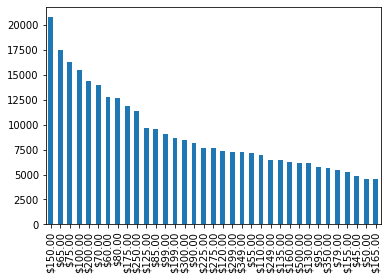

In [48]:
tmp[:35].plot(kind='bar')

In [47]:
print(tmp[:35] / total)
print((tmp[:35] / total).sum())

$150.00    0.032272
$65.00     0.027243
$75.00     0.025269
$100.00    0.024103
$200.00    0.022279
$70.00     0.021671
$60.00     0.019829
$80.00     0.019672
$175.00    0.018506
$250.00    0.017752
$125.00    0.015008
$85.00     0.014924
$99.00     0.014122
$199.00    0.013528
$300.00    0.013125
$90.00     0.012680
$225.00    0.011973
$275.00    0.011903
$120.00    0.011419
$299.00    0.011341
$349.00    0.011231
$55.00     0.011076
$110.00    0.010881
$249.00    0.010051
$135.00    0.009990
$160.00    0.009695
$500.00    0.009584
$130.00    0.009584
$95.00     0.008984
$350.00    0.008808
$79.00     0.008404
$155.00    0.008105
$45.00     0.007507
$50.00     0.007102
$165.00    0.007070
Name: price, dtype: float64
0.49669148120559165


  - price has 665,853 empty rows ( almost 1/2 of whole data )
  - price is Nan when room is not available
  - price range is various and rates look similar
  - from \$45 to \$500

### Listing

In [53]:
# listing
print(bt_list_df.shape)
print(bt_list_df.columns)
print(len(bt_list_df.columns.tolist()))

(3585, 95)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       '

In [58]:
bt_list_df.isnull().sum().to_dict()

{'access': 1489,
 'accommodates': 0,
 'amenities': 0,
 'availability_30': 0,
 'availability_365': 0,
 'availability_60': 0,
 'availability_90': 0,
 'bathrooms': 14,
 'bed_type': 0,
 'bedrooms': 10,
 'beds': 9,
 'calculated_host_listings_count': 0,
 'calendar_last_scraped': 0,
 'calendar_updated': 0,
 'cancellation_policy': 0,
 'city': 2,
 'cleaning_fee': 1107,
 'country': 0,
 'country_code': 0,
 'description': 0,
 'experiences_offered': 0,
 'extra_people': 0,
 'first_review': 756,
 'guests_included': 0,
 'has_availability': 3585,
 'host_about': 1309,
 'host_acceptance_rate': 471,
 'host_has_profile_pic': 0,
 'host_id': 0,
 'host_identity_verified': 0,
 'host_is_superhost': 0,
 'host_listings_count': 0,
 'host_location': 11,
 'host_name': 0,
 'host_neighbourhood': 339,
 'host_picture_url': 0,
 'host_response_rate': 471,
 'host_response_time': 471,
 'host_since': 0,
 'host_thumbnail_url': 0,
 'host_total_listings_count': 0,
 'host_url': 0,
 'host_verifications': 0,
 'house_rules': 1192,


In [59]:
bt_list_df.iloc[0].to_dict()

{'access': 'You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard.',
 'accommodates': 4,
 'amenities': '{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}',
 'availability_30': 0,
 'availability_365': 0,
 'availability_60': 0,
 'availability_90': 0,
 'bathrooms': 1.5,
 'bed_type': 'Real Bed',
 'bedrooms': 2.0,
 'beds': 3.0,
 'calculated_host_listings_count': 1,
 'calendar_last_scraped': '2016-09-06',
 'calendar_updated': '2 weeks ago',
 'cancellation_policy': 'moderate',
 'city': 'Boston',
 'cleaning_fee': '$35.00',
 'country': 'United States',
 'country_code': 'US',
 'description': "Cozy, sunny, family home.  Master bedroom high ceilings. Deck, garden with hens, beehives & play structure.   Short walk to charming village with  attractive stores, groceries & local restaurants. Friendly neigh

- 3585 accommodations are on the list
- 95 columns describe accommodation
- Many fields have lots of nan rows

# 3. Data wrangle and clean to check Hypothesis

## Busy Season
 - Hypothesis: data which available is f may be gathered in specific date range

In [60]:
# change data type
bt_cal_df['date'] = pd.to_datetime(bt_cal_df['date'])

In [61]:
# Check rate
bt_cal_df.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [ ]:
total_count_per_date = bt_cal_df.date.value_counts().sort_index()

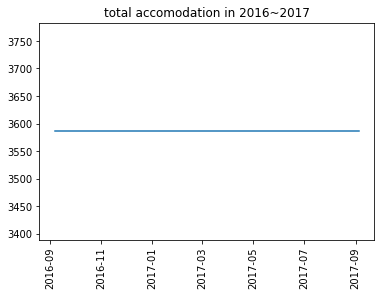

In [ ]:
plt.plot(total_count_per_date.index, total_count_per_date.values)
plt.xticks(rotation=90)
plt.title('total accomodation in 2016~2017')
plt.show()

 - number of total accomodation was same, 3586
 - but

In [ ]:
reserved_accoms = bt_cal_df[bt_cal_df.available == "f"]

In [ ]:
reserved_accoms.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [ ]:
count_per_date = reserved_accoms.date.value_counts().sort_index()
# count_per_date_2016 = count_per_date[count_per_date.index < pd.Timestamp(2017,1,1)]
# count_per_date_2017 = count_per_date[count_per_date.index > pd.Timestamp(2016,12,31)]

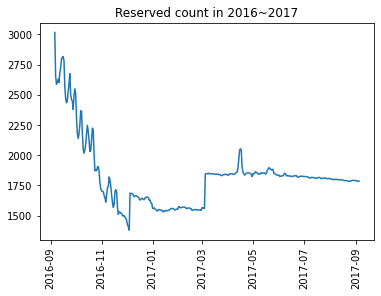

In [ ]:
plt.plot(count_per_date.index, count_per_date.values)
plt.xticks(rotation=90)
plt.title('Reserved count in 2016~2017')
plt.show()

 - decreasing reserved count = increasing available rooms
 - why?? 

 - hard to find season *pattern*
 - as a result, ***it is difficult to expect people make a reservation in specific season***

## Popularity of location
  - Hypothesis: several locations are preferred to stay

In [ ]:
count_listing_ids = reserved_accoms.listing_id.value_counts()

In [ ]:
add_listing_count = pd.merge(bt_list_df, count_listing_ids, left_on='id', right_index=True)

In [ ]:
add_listing_count.neighbourhood.nunique()

30

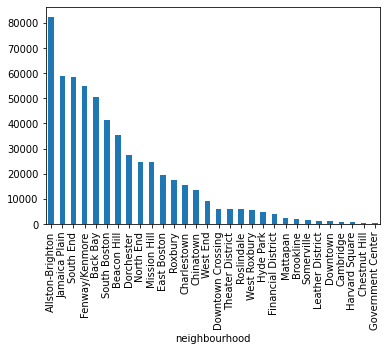

In [ ]:
add_listing_count.groupby('neighbourhood').listing_id.agg('sum').sort_values(ascending=False).plot(kind='bar')


 - "Allston-Brighton" is the most popular case to accomodate
 - There are places people prefered to accomodate

## Preferred price pattern

*   the data ,"available" field is "f", has no price
* assume that data may have similar price


In [62]:
date_price = bt_cal_df.dropna(subset=['price'])

  - About half of accommodations are not available, so it is difficult to know the price
  - Above cell in Calender below Explore, top N price are not much higher
  - Based on this reason, assume that unavailable accommodation would have similar price if they could be available 

In [ ]:
date_price['price'] = date_price.price.apply(lambda x: float(x.replace('$', '').replace(',', '')))
date_price['date'] = pd.to_datetime(date_price['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


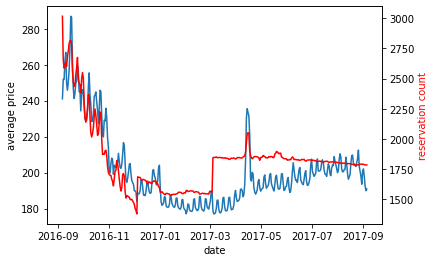

In [ ]:
fig, ax = plt.subplots()
tmp_df = date_price.groupby('date')['price'].agg('mean').reset_index()
ax.plot(tmp_df['date'], tmp_df['price'])
ax.set_xlabel('date')
ax.set_ylabel('average price')

ax2 = ax.twinx()
ax2.plot(count_per_date.index, count_per_date.values, color='red')
ax2.set_ylabel('reservation count', color='red')
plt.show()

 - Although we don't know why some accommodations are unavailable, assume that those accommodation are resereved
 - It is hard to see pattern both price and reserevation

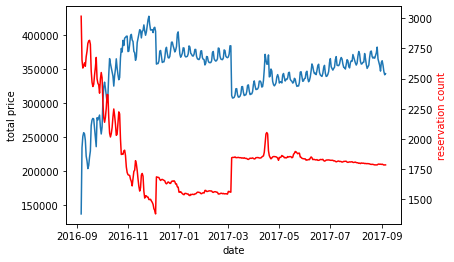

In [ ]:
fig, ax = plt.subplots()
tmp_df = date_price.groupby('date')['price'].agg('sum').reset_index()
ax.plot(tmp_df['date'], tmp_df['price'])
ax.set_xlabel('date')
ax.set_ylabel('total price')

ax2 = ax.twinx()
ax2.plot(count_per_date.index, count_per_date.values, color='red')
ax2.set_ylabel('reservation count', color='red')
plt.show()

Text(0, 0.5, 'listing_id count')

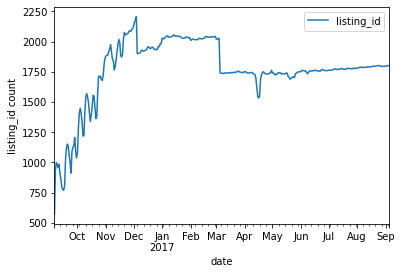

In [ ]:
ax = date_price.groupby('date')['listing_id'].agg('count').reset_index().plot('date', 'listing_id')
ax.set_ylabel('listing_id count')

 - Although total accomodation number is same, reserved number has decreased.
 - but price has increased ?!
 - accomodation number was increased when the price is decrased

### Price per Weekday

In [ ]:
date_price['weekday'] = date_price['date'].dt.day_name()
bt_cal_df['weekday'] = bt_cal_df['date'].dt.day_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
weekday_cnt = bt_cal_df.groupby('weekday').listing_id.agg('count').to_dict()

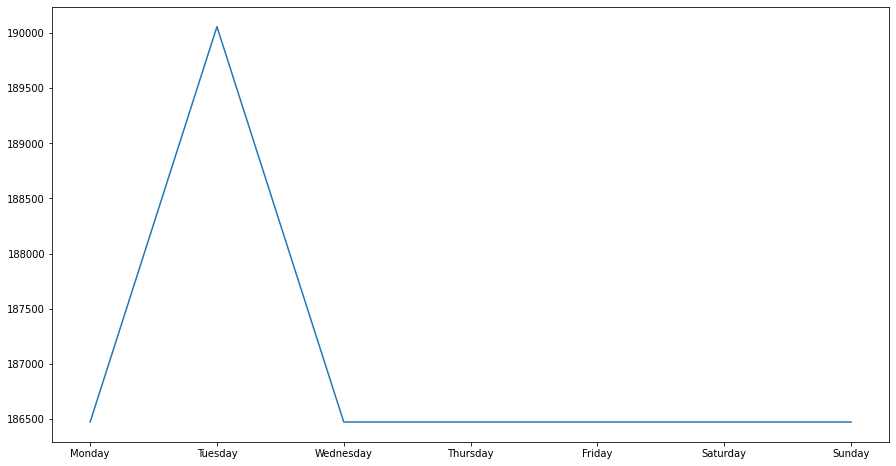

In [ ]:
plt.figure(figsize=(15, 8))

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
mapping = {day: i for i, day in enumerate(order)}
key = bt_cal_df['weekday'].map(mapping)

plt.plot(order, [weekday_cnt[weekday] for weekday in order])
# sns.boxplot(x='weekday', y='count', data=bt_cal_df, width=0.6, order=order)
plt.show()

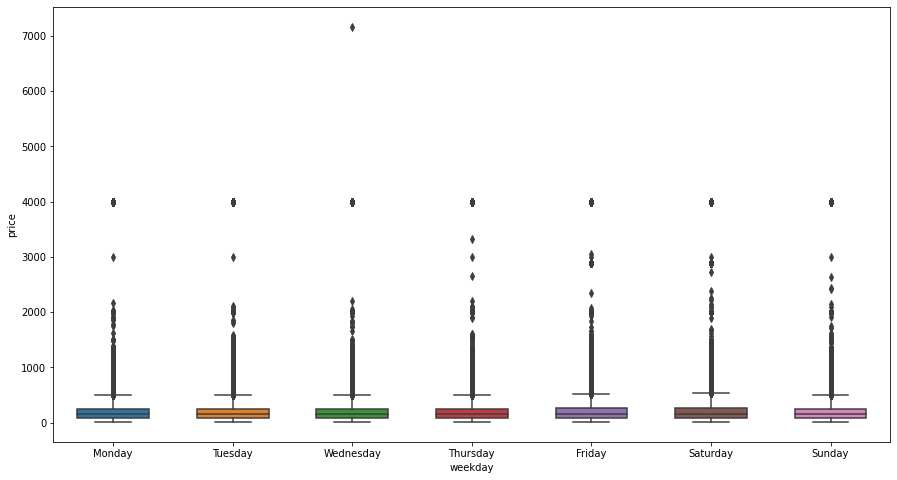

In [ ]:
# date_price['weekday'] = date_price['date'].dt.day_name()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.boxplot(x='weekday', y='price', data=date_price, width=0.6, order=order)
plt.show()

- hard to see price boxplot each weekday...

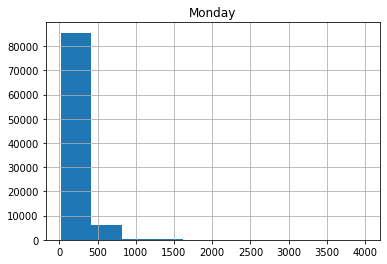

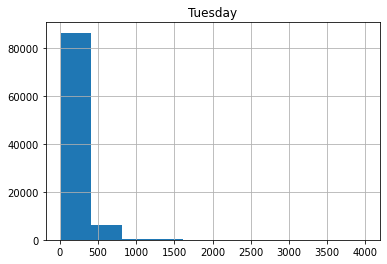

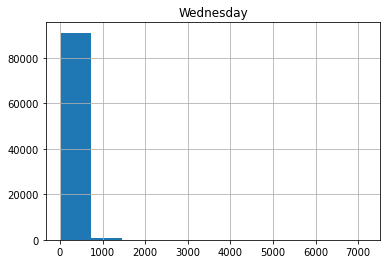

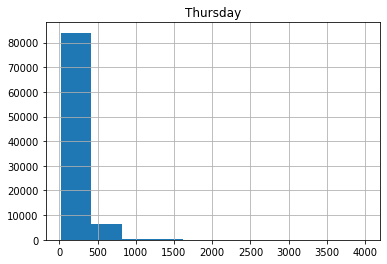

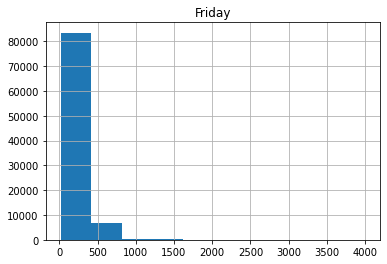

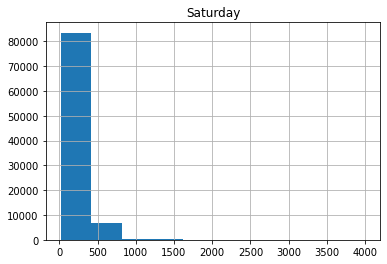

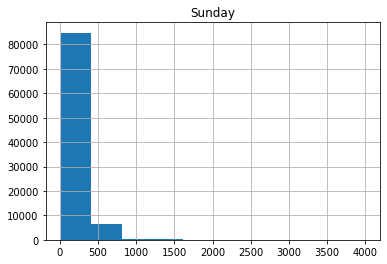

In [ ]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for weekday in order:
  date_price[date_price.weekday==weekday].hist(column="price")
  plt.title(weekday)
  plt.show()

 - price range in each weekday was very similar

---

## Popular room type
  - Hypothesis: People prefer specific room type
    - Assume that available == 'f' means accommotaions are reserved

In [ ]:
df_w_room_type = pd.merge(bt_cal_df, bt_list_df.loc[:, ['id', 'room_type']], left_on='listing_id', right_on='id')

In [ ]:
df_w_room_type.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

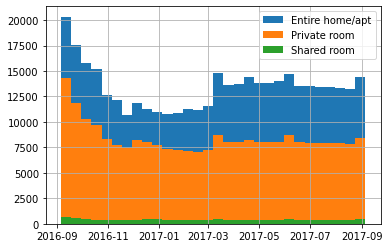

In [ ]:
tmp = df_w_room_type[df_w_room_type.available == 'f'].groupby('room_type')
tmp.get_group('Entire home/apt')['date'].hist(bins=30, label='Entire home/apt')
tmp.get_group('Private room')['date'].hist(bins=30, label='Private room')
tmp.get_group('Shared room')['date'].hist(bins=30, label='Shared room')
plt.legend()
plt.show()

- people usually make a reservation room, type Entire home/apt
- sometime Private room
- Shared room has a little reservation

# Conclusion
 - I thought some reasons source to make a reservation for some people
   - season, popular location, prefered room type, prefer weekday
 - popular location, prefered room type are the best make a reservation
 - unexpectedly, season, weekday are not much effected 